In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = Path("IMÁGENES FILTRADAS/")

In [5]:
path.ls()

[PosixPath('IMÁGENES FILTRADAS/BURKITT_32.jpg'),
 PosixPath('IMÁGENES FILTRADAS/LLC_6.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_20.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_16.jpg'),
 PosixPath('IMÁGENES FILTRADAS/HCL_21.jpg'),
 PosixPath('IMÁGENES FILTRADAS/HCL_10.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_110.jpg'),
 PosixPath('IMÁGENES FILTRADAS/LLC_48.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_85.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_73.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_7.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_138.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_44.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_147.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_62.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_10.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_135.jpg'),
 PosixPath('IMÁGENES FILTRADAS/HCL_6.jpg'),
 PosixPath('IMÁGENES FILTRADAS/LCM_23.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_107.jpg'),
 PosixPath('IMÁGENES FILTRAD

In [6]:
fnames = get_image_files(path)
fnames[:10]

[PosixPath('IMÁGENES FILTRADAS/BURKITT_32.jpg'),
 PosixPath('IMÁGENES FILTRADAS/LLC_6.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_20.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_16.jpg'),
 PosixPath('IMÁGENES FILTRADAS/HCL_21.jpg'),
 PosixPath('IMÁGENES FILTRADAS/HCL_10.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_110.jpg'),
 PosixPath('IMÁGENES FILTRADAS/LLC_48.jpg'),
 PosixPath('IMÁGENES FILTRADAS/FOLICULAR_85.jpg'),
 PosixPath('IMÁGENES FILTRADAS/BURKITT_73.jpg')]

In [7]:
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=363).normalize(imagenet_stats)

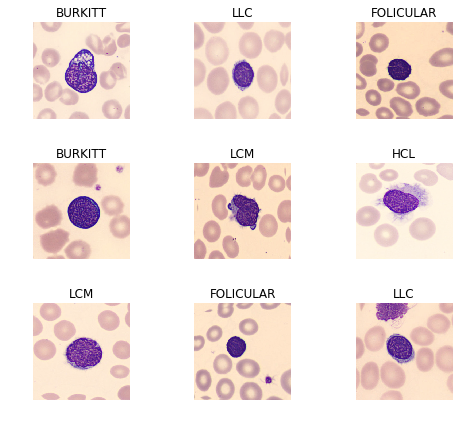

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)

['BURKITT', 'FOLICULAR', 'HCL', 'LCM', 'LLC']


In [11]:
len(data.classes),data.c

(5, 5)

## Bloque 1 - ResNet34

In [86]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [87]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [13]:
learn.fit_one_cycle(4)

In [14]:
learn.save('stage-1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

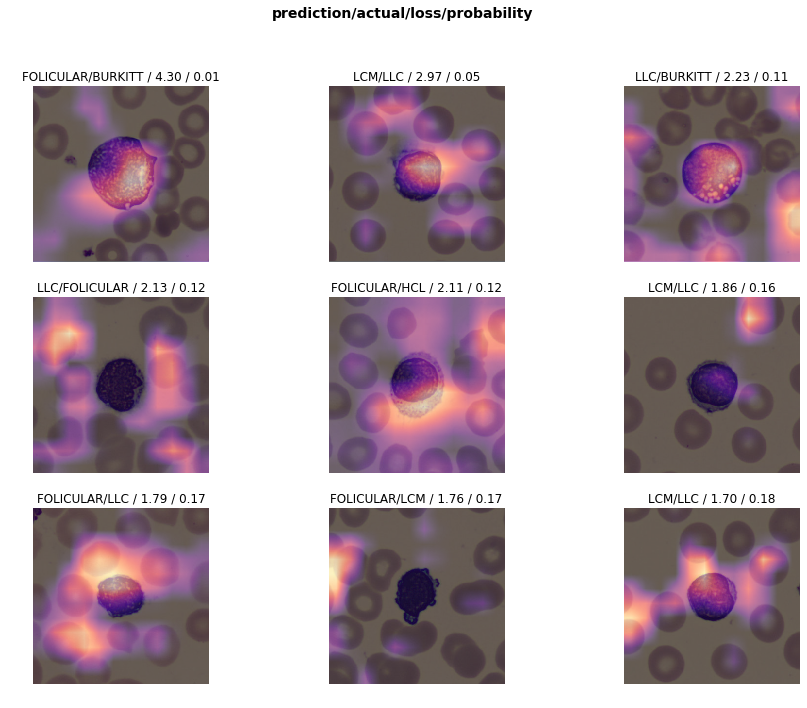

In [16]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

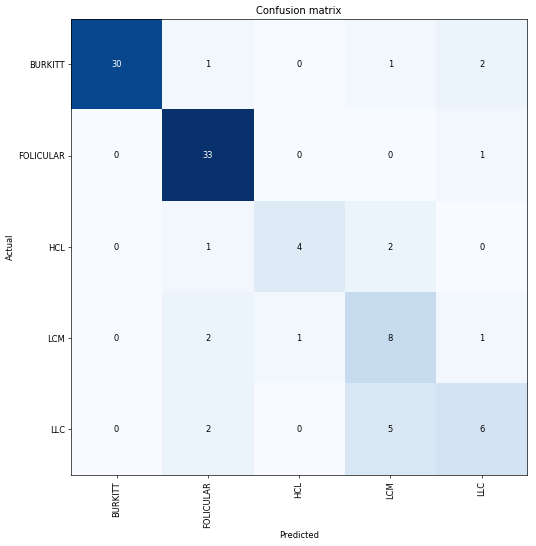

In [17]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60, normalize=False)


In [18]:
interp.most_confused(min_val=2)

[('LLC', 'LCM', 5),
 ('BURKITT', 'LLC', 2),
 ('HCL', 'LCM', 2),
 ('LCM', 'FOLICULAR', 2),
 ('LLC', 'FOLICULAR', 2)]

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(1)

In [21]:
learn.load('stage-1');

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


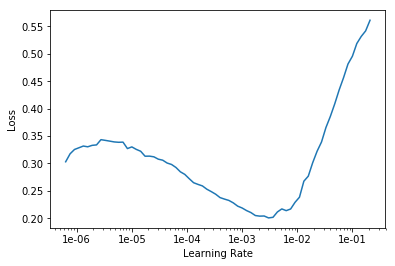

In [23]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

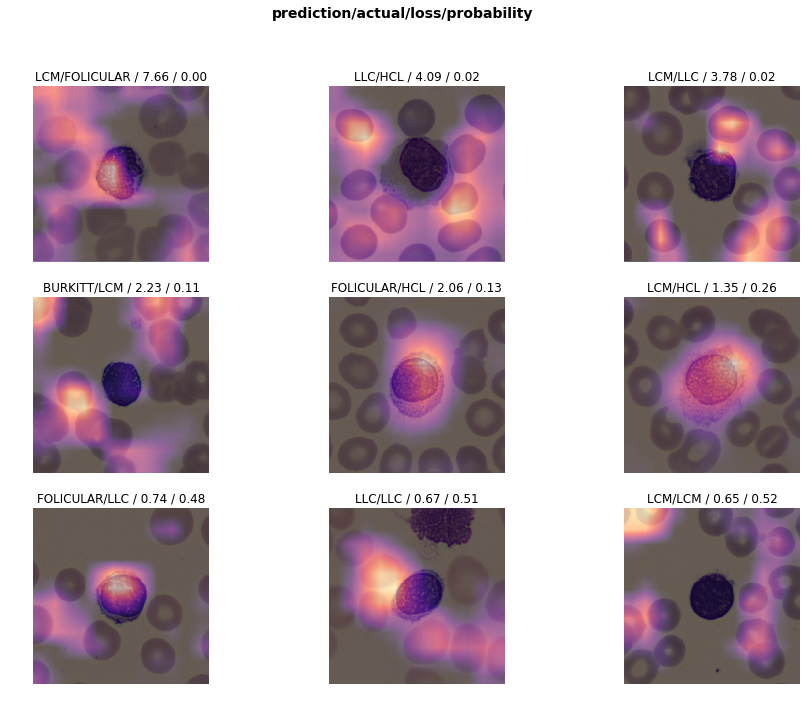

In [27]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

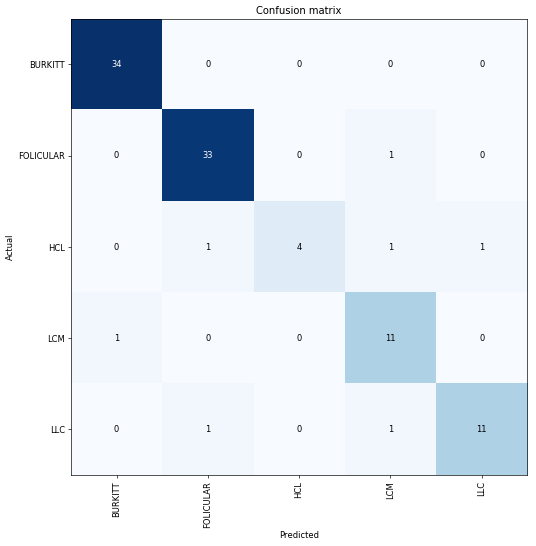

In [28]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60, normalize=False)

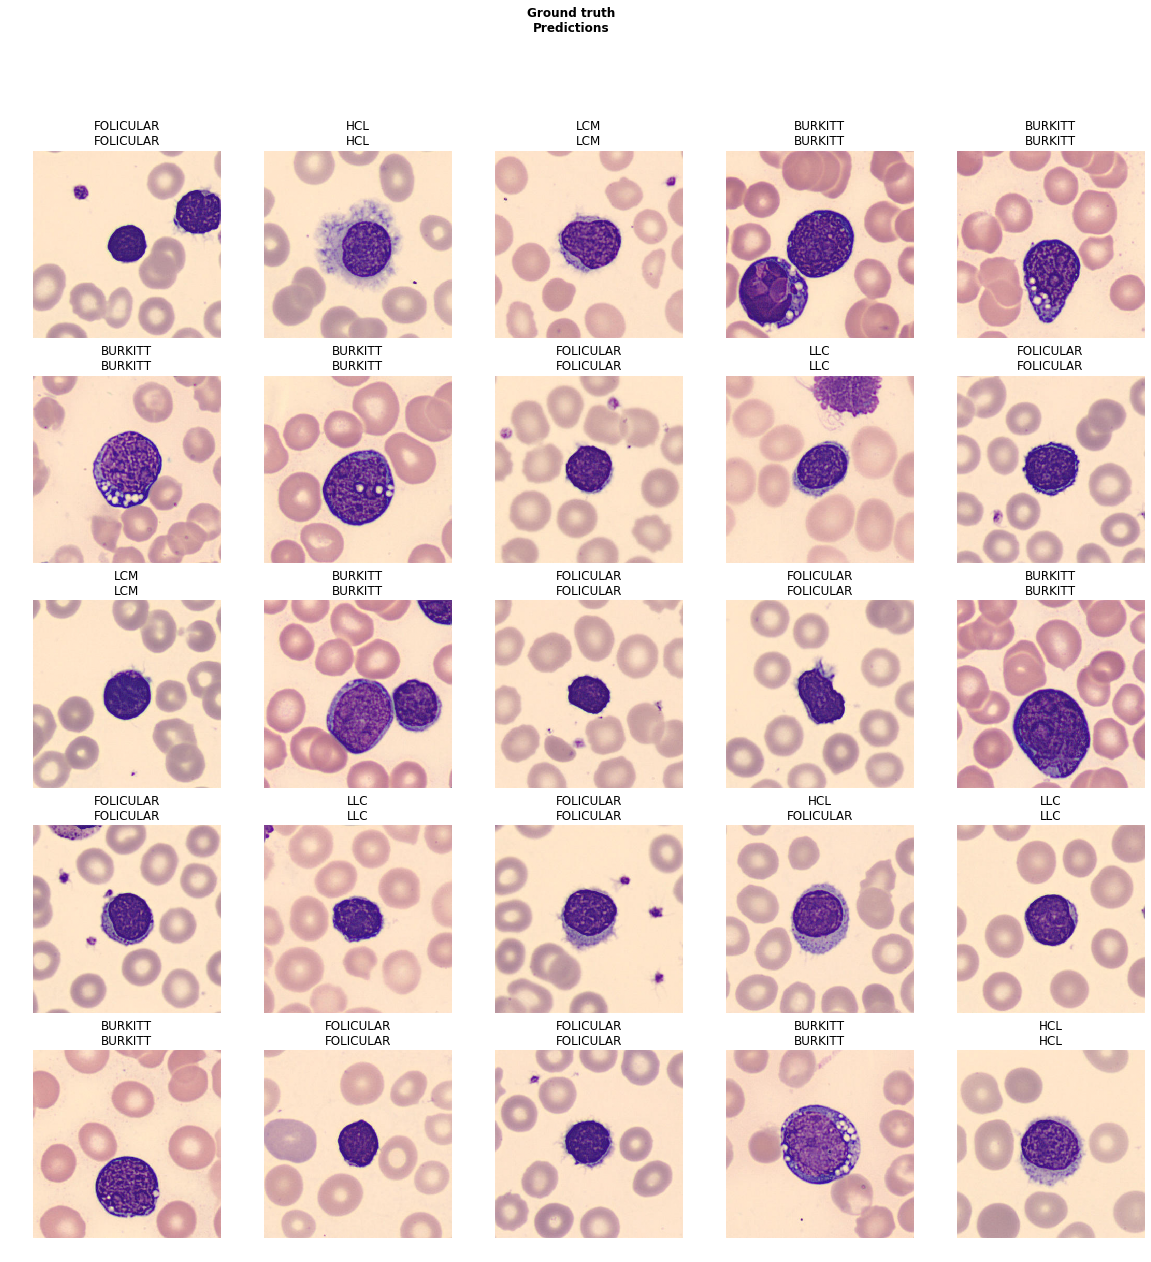

In [29]:
learn.show_results()

## Bloque 2 - ResNet50

In [12]:
bs = 64

In [13]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size =363, bs=bs//2).normalize(imagenet_stats)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [57]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [58]:
learn.fit_one_cycle(4)

In [59]:
learn.save('stage-2')

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

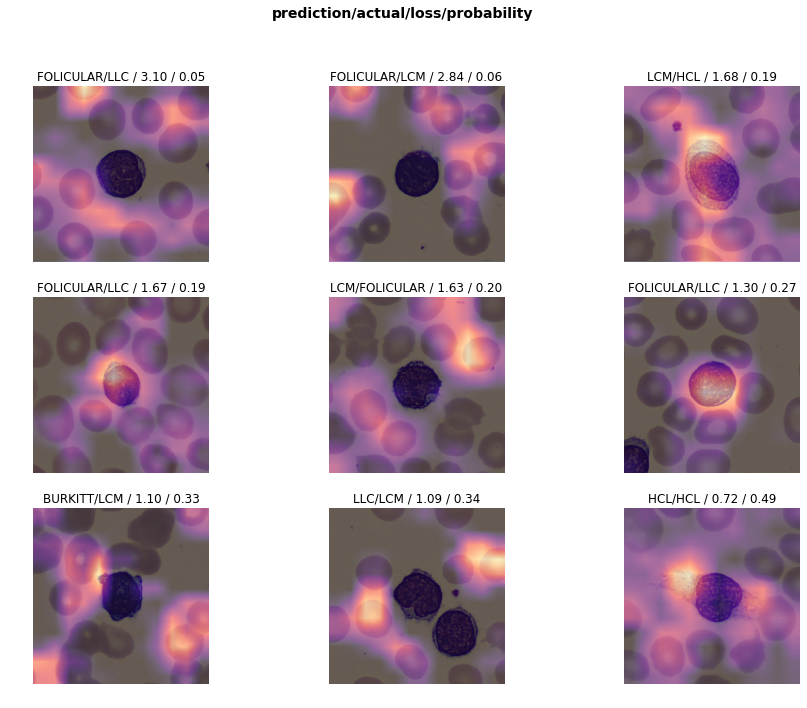

In [62]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

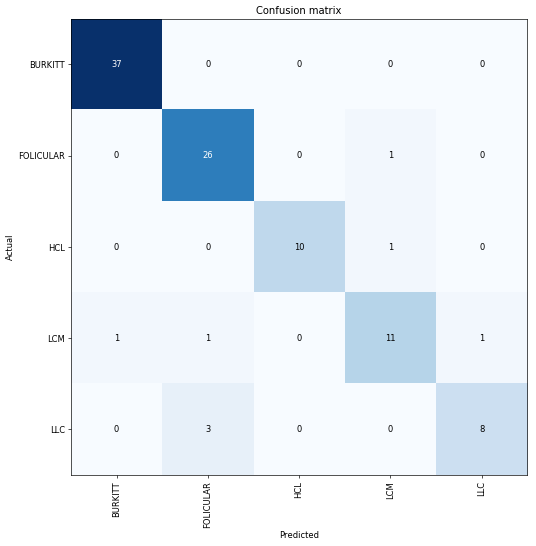

In [63]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60, normalize=False)

In [64]:
interp.most_confused(min_val=1)

[('LLC', 'FOLICULAR', 3),
 ('FOLICULAR', 'LCM', 1),
 ('HCL', 'LCM', 1),
 ('LCM', 'BURKITT', 1),
 ('LCM', 'FOLICULAR', 1),
 ('LCM', 'LLC', 1)]

In [65]:
learn.unfreeze()

In [66]:
learn.fit_one_cycle(1)

In [67]:
learn.load('stage-2');

In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


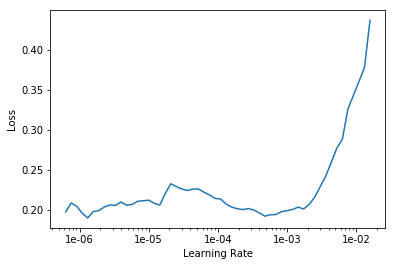

In [69]:
learn.recorder.plot()

In [71]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [72]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

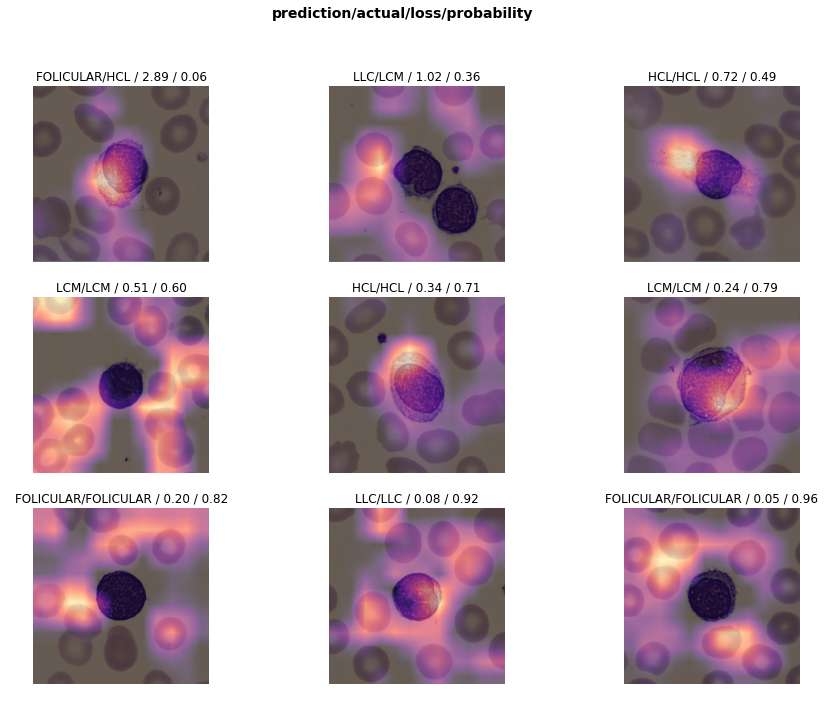

In [73]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

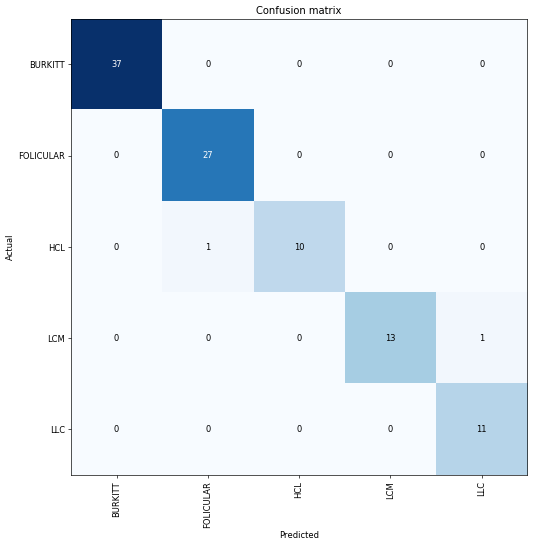

In [74]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60, normalize=False)

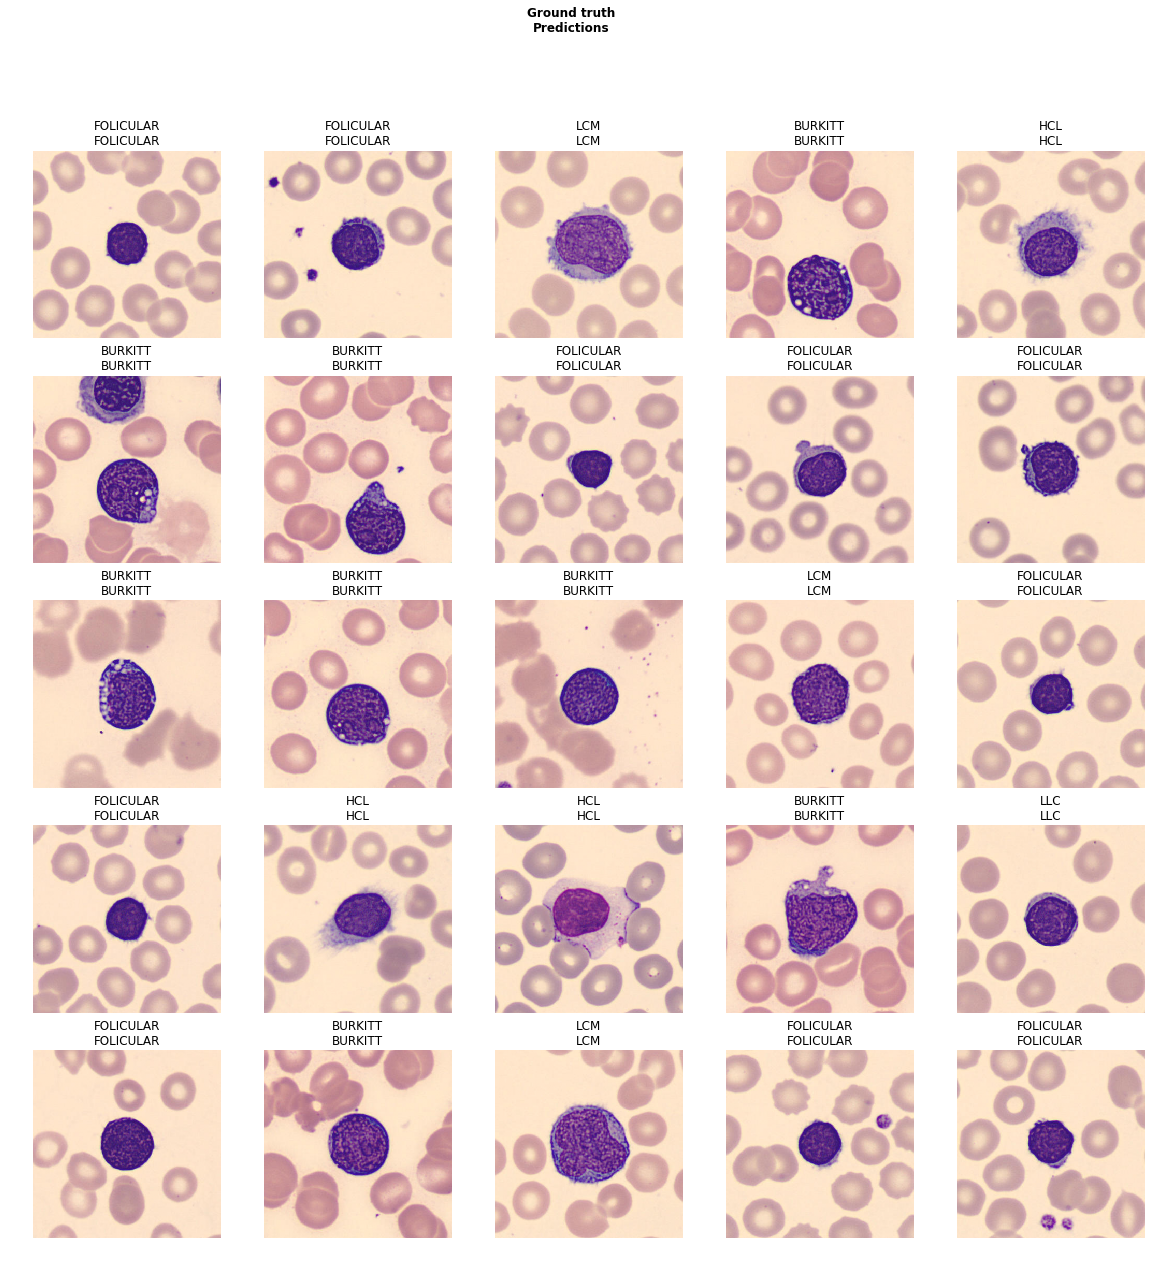

In [75]:
learn.show_results()

## DICCIONARIO PARA BLOQUE 5

In [88]:
pesos_dic = learn.model.state_dict()
pesos_dic

OrderedDict([('0.0.weight',
              tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
                          3.0660e-02,  2.5398e-02],
                        [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
                          2.9754e-02,  4.1735e-02],
                        [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
                         -1.1601e-01, -1.2191e-01],
                        ...,
                        [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
                          2.4631e-03,  1.6726e-02],
                        [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
                          7.3973e-02,  5.9085e-02],
                        [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
                          8.3749e-02,  9.6970e-02]],
              
                       [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
                          2.5483e-

In [89]:
modelo = models.resnet34(pretrained=True)

In [90]:
type(learn.model)

torch.nn.modules.container.Sequential

In [91]:
type(modelo)

torchvision.models.resnet.ResNet

In [92]:
pretrained_dict = pesos_dic
modelo = models.resnet34(pretrained=True)
model_dict = modelo.state_dict()

# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
# 3. load the new state dict
modelo.load_state_dict(model_dict)

In [93]:
type(modelo)

torchvision.models.resnet.ResNet

In [94]:
type(pesos_dic)

collections.OrderedDict

In [97]:
import pickle
pesos_dic
pickle_out = open("dict.pickle","wb")
pickle.dump(pesos_dic, pickle_out)
pickle_out.close()

## DICCIONARIO PARA BLOQUE 6

In [15]:
pesos_dic50 = learn.model.state_dict()

In [16]:
modelo50 = models.resnet50(pretrained=True)

In [17]:
import pickle
pesos_dic50
pickle_out50 = open("dict.pickle","wb")
pickle.dump(pesos_dic50, pickle_out50)
pickle_out50.close()